In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

# Create a list for holding the cities.
cities = []
city_data = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=604c60a695213c78478f704076a569c2


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=604c60a695213c78478f704076a569c2&q=Boston


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | ushuaia
Processing Record 2 of Set 12 | padang
Processing Record 3 of Set 12 | albany
Processing Record 4 of Set 12 | ahipara
Processing Record 5 of Set 12 | bengkulu
Processing Record 6 of Set 12 | cap malheureux
Processing Record 7 of Set 12 | jamestown
Processing Record 8 of Set 12 | busselton
Processing Record 9 of Set 12 | effingham
Processing Record 10 of Set 12 | rikitea
Processing Record 11 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 12 of Set 12 | hermanus
Processing Record 13 of Set 12 | port elizabeth
Processing Record 14 of Set 12 | yellowknife
Processing Record 15 of Set 12 | vaini
Processing Record 16 of Set 12 | hithadhoo
Processing Record 17 of Set 12 | mataura
Processing Record 18 of Set 12 | kavieng
Processing Record 19 of Set 12 | kodiak
Processing Record 20 of Set 12 | vestmannaeyjar
Processing Record 21 of Set 12 | pevek
Processing Record 22 of Set 

Processing Record 30 of Set 15 | temaraia
City not found. Skipping...
Processing Record 31 of Set 15 | ziro
Processing Record 32 of Set 15 | aracoiaba
Processing Record 33 of Set 15 | bowmore
Processing Record 34 of Set 15 | takoradi
Processing Record 35 of Set 15 | heishan
Processing Record 36 of Set 15 | maniitsoq
Processing Record 37 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 15 | saint anthony
Processing Record 39 of Set 15 | ponta do sol
Processing Record 40 of Set 15 | broken hill
Processing Record 41 of Set 15 | rawson
Processing Record 42 of Set 15 | port hardy
Processing Record 43 of Set 15 | kilindoni
Processing Record 44 of Set 15 | viytivka
Processing Record 45 of Set 15 | huarmey
Processing Record 46 of Set 15 | saiha
Processing Record 47 of Set 15 | breves
Processing Record 48 of Set 15 | santhia
Processing Record 49 of Set 15 | axim
Processing Record 50 of Set 15 | lompoc
Processing Record 1 of Set 16 | minsk
Processing Record 2 of S

Processing Record 16 of Set 19 | caravelas
Processing Record 17 of Set 19 | longyearbyen
Processing Record 18 of Set 19 | kalengwa
Processing Record 19 of Set 19 | komsomolskiy
Processing Record 20 of Set 19 | ha noi
Processing Record 21 of Set 19 | boende
Processing Record 22 of Set 19 | chuy
Processing Record 23 of Set 19 | alofi
Processing Record 24 of Set 19 | polis
Processing Record 25 of Set 19 | smirnykh
Processing Record 26 of Set 19 | port-gentil
Processing Record 27 of Set 19 | savona
Processing Record 28 of Set 19 | along
Processing Record 29 of Set 19 | maxixe
Processing Record 30 of Set 19 | bayburt
Processing Record 31 of Set 19 | yerofey pavlovich
Processing Record 32 of Set 19 | arman
Processing Record 33 of Set 19 | lasa
Processing Record 34 of Set 19 | mangrol
Processing Record 35 of Set 19 | longyan
Processing Record 36 of Set 19 | katherine
Processing Record 37 of Set 19 | shanting
Processing Record 38 of Set 19 | luorong
Processing Record 39 of Set 19 | srednekolym

Processing Record 5 of Set 23 | omboue
Processing Record 6 of Set 23 | krasnoselkup
Processing Record 7 of Set 23 | cepelare
Processing Record 8 of Set 23 | monrovia
Processing Record 9 of Set 23 | xuddur
Processing Record 10 of Set 23 | abu samrah
Processing Record 11 of Set 23 | tomatlan
Processing Record 12 of Set 23 | ust-charyshskaya pristan
Processing Record 13 of Set 23 | yarmouth
Processing Record 14 of Set 23 | tank
Processing Record 15 of Set 23 | havre de grace
Processing Record 16 of Set 23 | nabire
Processing Record 17 of Set 23 | xining
Processing Record 18 of Set 23 | riyadh
Processing Record 19 of Set 23 | arkhangelskoye
Processing Record 20 of Set 23 | sisophon
Processing Record 21 of Set 23 | ilulissat
Processing Record 22 of Set 23 | flin flon
Processing Record 23 of Set 23 | surin
Processing Record 24 of Set 23 | halalo
City not found. Skipping...
Processing Record 25 of Set 23 | touros
Processing Record 26 of Set 23 | murashi
Processing Record 27 of Set 23 | cockbu

In [8]:
len_city_data = len(city_data)
print(len_city_data)

NameError: name 'city_data' is not defined

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-04-16 08:06:42,-54.80,-68.30,46.40,75,56,3.36
1,Padang,ID,2020-04-16 08:11:24,-0.95,100.35,84.06,73,96,4.03
2,Albany,US,2020-04-16 08:05:08,42.60,-73.97,35.01,80,90,4.70
3,Ahipara,NZ,2020-04-16 08:10:41,-35.17,173.17,62.78,80,39,14.79
4,Bengkulu,ID,2020-04-16 08:10:07,-3.80,102.27,85.39,68,92,5.21
5,Cap Malheureux,MU,2020-04-16 08:13:56,-19.98,57.61,82.40,69,75,14.99
6,Jamestown,US,2020-04-16 08:07:13,42.10,-79.24,28.00,92,20,6.93
7,Busselton,AU,2020-04-16 08:06:18,-33.65,115.33,70.00,32,1,14.29
8,Effingham,US,2020-04-16 08:13:56,32.37,-81.33,55.40,87,1,6.93
9,Rikitea,PF,2020-04-16 08:09:10,-23.12,-134.97,78.06,79,100,17.94


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/16/20'

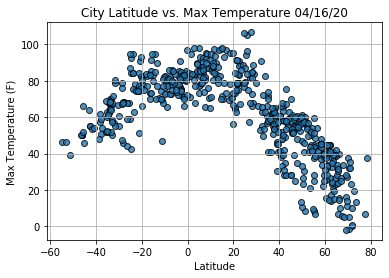

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

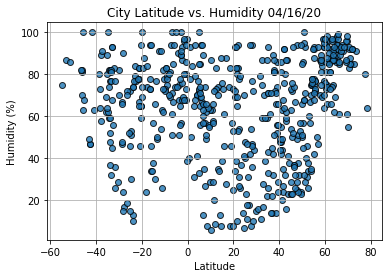

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

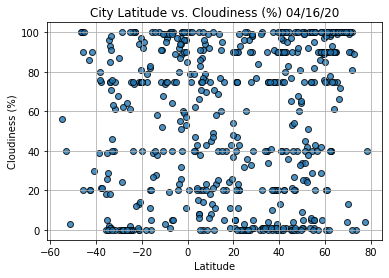

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

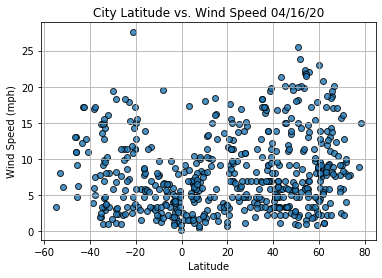

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [5]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.  
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()